In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

In [3]:
raw_dataset = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/auto-mpg.data',
                          sep = ' ', skipinitialspace = True, comment = '\t' , names = Columns, na_values = '?' )

In [4]:
raw_dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [5]:
raw_dataset.shape

(398, 8)

In [6]:
raw_dataset.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [7]:
raw_dataset['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [8]:
np.round(raw_dataset['horsepower']).median()

93.5

In [9]:
raw_dataset.replace(np.nan, np.round(raw_dataset['horsepower'].median()), inplace=True)

In [10]:
raw_dataset.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [11]:
raw_dataset['origin'].unique()

array([1, 3, 2])

In [12]:
origin = pd.get_dummies(raw_dataset['origin'])

In [13]:
# Concatenate multiple dataframes
mpg_df = pd.concat([raw_dataset, origin], axis = 1)

In [14]:
mpg_df.drop(['origin'], axis = 1, inplace=True)

In [15]:
mpg_df.rename({ 1:'USA', 2:'Europe', 3:'Japan' }, axis = 1, inplace=True )

In [16]:
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0


**Correlation**

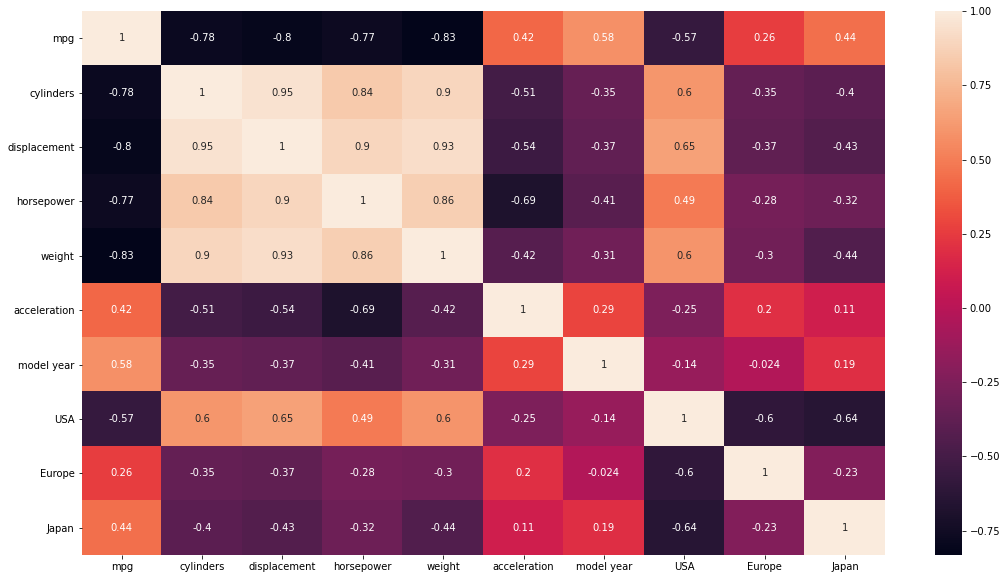

In [17]:
plt.figure(figsize = (18,10))
sns.heatmap(mpg_df.corr(), annot = True)

**Train & Test Split**

In [18]:
X = mpg_df.drop('mpg', axis = 1)

In [19]:
Y = mpg_df['mpg']

**Data Pre-Processing**

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

scaler.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [21]:
scaler_X = scaler.transform(X)

**Cross Validation**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(scaler_X, Y, test_size = 0.2, random_state = 2)

**ANN Algorithm**

In [24]:
# Dense Layer in NN
from keras.layers import Dense
# Feed Foreward NN
from keras.models import Sequential
# Model Optimizers
from keras.optimizers import RMSprop

In [25]:
def build_model ():
  model = Sequential()
  # Input Layer : num of neurons = (2)^n
  model.add(Dense(units = 64, activation='relu', input_shape = [len(X.keys())]))
  # Hidden Layer - I
  model.add(Dense(units = 128, activation='relu'))
  # Hidden Layer - II
  model.add(Dense(units = 128, activation='relu'))
  # Output Layer
  model.add(Dense(units = 1))

  # Optimizers = RMSProp
  # Alpha = Learning Rate : sample size = small (0.0001), sample size = large (0.01)
  optimizers = RMSprop(learning_rate= 0.0001)

  # For Regression : loss function - mean_squared_error
  model.compile(loss = 'mean_squared_error', optimizer = optimizers, metrics = ['mean_squared_error', 
                                                                                'mean_absolute_error'])
  return model 

In [26]:
model = build_model()

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 25,601
Trainable params: 25,601
Non-trainable params: 0
_________________________________________________________________


In [28]:
# epochs = Number of iterations
# batch_size = 20 : A small sample / batch sample taken for iterations in every epoch
# validation_split = 15% of overall data from training dataset for validation 
history = model.fit(X_train, Y_train, epochs = 600, batch_size = 20, validation_split=0.15)

Epoch 1/600
14/14 [==============================] - 0s 14ms/step - loss: 597.2796 - mean_squared_error: 597.2796 - mean_absolute_error: 23.1485 - val_loss: 622.3703 - val_mean_squared_error: 622.3703 - val_mean_absolute_error: 23.7929
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 587.8350 - mean_squared_error: 587.8350 - mean_absolute_error: 22.9305 - val_loss: 613.7614 - val_mean_squared_error: 613.7614 - val_mean_absolute_error: 23.6006
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 579.4232 - mean_squared_error: 579.4232 - mean_absolute_error: 22.7358 - val_loss: 605.0943 - val_mean_squared_error: 605.0943 - val_mean_absolute_error: 23.4049
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 570.8102 - mean_squared_error: 570.8102 - mean_absolute_error: 22.5332 - val_loss: 596.1194 - val_mean_squared_error: 596.1194 - val_mean_absolute_error: 23.2008
Epoch 5/600
14/14 [==============================] - 0s 3ms

In [29]:
pd.DataFrame(history.history)

,loss,mean_squared_error,mean_absolute_error,val_loss,val_mean_squared_error,val_mean_absolute_error
0,597.279602,597.279602,23.148464,622.370300,622.370300,23.792883
1,587.835022,587.835022,22.930508,613.761353,613.761353,23.600571
2,579.423157,579.423157,22.735758,605.094299,605.094299,23.404884
3,570.810242,570.810242,22.533190,596.119385,596.119385,23.200750
4,561.755432,561.755371,22.316195,586.539978,586.539978,22.981308
...,...,...,...,...,...,...
595,6.078958,6.078958,1.746299,6.439217,6.439217,1.914318
596,6.165306,6.165306,1.754050,6.354506,6.354506,1.963786
597,6.067455,6.067455,1.732928,6.387932,6.387932,1.908968
598,6.141519,6.141519,1.754393,6.312058,6.312058,1.946931


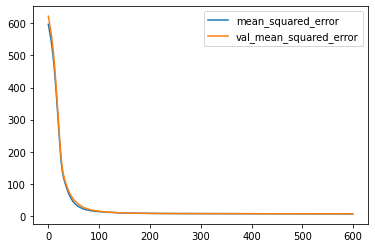

In [30]:
pd.DataFrame(history.history)[['mean_squared_error','val_mean_squared_error']].plot()

**Regression Matrics**

In [31]:
prediction = model.predict(X_test)

In [32]:
# r2 (r-squared) - measure of detemination in regression
from sklearn.metrics import r2_score
r2_score(Y_test, prediction) 

0.8873399675695208

**Make Predictions**

In [33]:
X_new = [[6,	307.0,	140.0,	2904.0,	12.0,	70,	1,	0,	0]]

In [34]:
scaler_X_New = scaler.transform(X_new)

In [35]:
model.predict(scaler_X_New)

array([[17.679865]], dtype=float32)